In [177]:
# Initialize Otter
import otter
grader = otter.Notebook("Homework #5.ipynb")

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# CS 639 - Foundations of Data Science

# Homework \#5


In this final homework, you will get to practice what you have learned about (linear) regression and classification and connect it to topics you learned about before (such as MLE, bootstrap, and confidence intervals).

<!-- BEGIN QUESTION -->

## Problem 1: Least Squares as MLE [$\color{blue}{\text{Extra Credit, 20pts}}$]

We mentioned in class that under suitable assumptions, the estimates we get for the coefficients $\beta$ in linear regression using least squares can also be viewed as maximum likelihood estimates. In this question, you are asked to prove this claim. The setup is as follows. Assume you are given $n$ pairs of feature vectors $x_i$ (of length $p \geq 1$) and their corresponding responses/labels $y_i$. Vectors $x_1, x_2, \dots, x_n$ are drawn i.i.d. from some underlying distribution. Response variables $y_1, y_2, \dots, y_n$ are related to the feature vectors via

$$
    y_i = \beta_0 + \beta_1 [x_i]_1 + \beta_2 [x_i]_2 + \dots + \beta_p [x_i]_p + \epsilon_i,
$$

where $\epsilon_i$ are random errors drawn i.i.d. from $\mathcal{N}(0, \sigma^2)$ ($\sigma^2$ is unknown), independently of $x_i$. As discussed in class, to perform linear regression, you want to estimate the coefficients $\beta_0, \beta_1, \dots, \beta_p.$

1. When $x_i$ is given (i.e., conditioning on $x_i$), what is the distribution of $y_i$?
2. What are the likelihood and the log-likelihood function? (You can write these functions conditioned on $x_1, \dots, x_n$ or not; your final answer should not get affected.)
3. Argue that maximizing the log-likelihood function is the same as minimizing the residual sum of squares (RSS), and, thus, least squares estimates of the coefficients $\beta_0, \beta_1, \dots, \beta_p$ are also maximum likelihood estimates.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Problem 2: Comparing Two Linear Regression Models

You are provided with the `lin_reg.csv` file that contains 4 columns and 100 rows. Each row has an independent sample of the values of three features $X_1, X_2, X_3$ followed by the value of a response $Y$ corresponding to those feature values. You are asked to train and evaluate two linear regression models:

$$
    f_1(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3
$$

and

$$
    f_2(X) = \beta_0 + \beta_1 X_1 + \beta_2 {X_2}^2 + \beta_3 {X_3}^3.
$$

You can use `numpy.linalg.lstsq` (https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) to compute the coefficients for these two models. Display clearly which value corresponds to which coefficient in your output. (You will need to add a column of ones in your array to compute `beta_0`; You can use `numpy.insert(arr, 0, 1, axis=1)` to insert one column of ones into your array.)

Using the techniques discussed in class, assess the accuracy of the two models and discuss which one of the two models you would use to make predictions and why.

I will use the second one as it is giving much lower Residual Squared Error (2.31) compared to the first one(RSE 196.52). The second model is non-linear and fitting the data better than the first one. The higher residual sum of square of the first model indicates that it is too simple to fit the given data. 

In [179]:
data = pd.read_csv("lin_reg.csv")
#print(data)
xtrain = data
xtrain = xtrain.to_numpy()
y = xtrain[:, 3]
xtrain = np.delete(xtrain, 3, axis=1)
xtrain = np.insert(xtrain,0,1,axis = 1)
a,b,c,d = np.linalg.lstsq(xtrain, y, rcond=None)
print(a)
print(b)
a = a.reshape(a.shape[0], -1)

ar = np.matmul(xtrain , a)
print(ar.shape)
y = y.reshape(y.shape[0], -1)
print(y.shape)

x = y - ar
x = np.square(x)
x = np.sum(x)
print(x) ##RSS/MSE
RSE = x / xtrain.shape[0]
RSE = np.sqrt(RSE)
print(RSE)

[-151.03190508   -9.84642241   -9.25205485   69.79907781]
[3862389.40874953]
(100, 1)
(100, 1)
3862389.4087495315
196.52962648795554


In [180]:
data = pd.read_csv("lin_reg.csv")
data['X_2']=np.power((data['X_2']),2)
data['X_3']=np.power((data['X_3']),3)
xtrain = data
xtrain = xtrain.to_numpy()
y = xtrain[:, 3]
xtrain = np.delete(xtrain, 3, axis=1)
xtrain = np.insert(xtrain,0,1,axis = 1)
a,b,c,d = np.linalg.lstsq(xtrain, y, rcond=None)
print(a)
print(b)
a = a.reshape(a.shape[0], -1)

ar = np.matmul(xtrain , a)
print(ar.shape)
y = y.reshape(y.shape[0], -1)
print(y.shape)

x = y - ar
x = np.square(x)
x = np.sum(x)
print(x) ##RSS/MSE
RSE = x / xtrain.shape[0]
RSE = np.sqrt(RSE)
print(RSE)

[ 1.52380685 -3.10041619 -0.49954944  0.20016408]
[536.27736962]
(100, 1)
(100, 1)
536.2773696191174
2.3157663302222815


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Problem 3: Classifying Apples and Oranges

Exercise 12(a)-(d) in Chapter 4 of the Intro to Stat Learning book (https://hastie.su.domains/ISLR2/ISLRv2_website.pdf).

(a)
log odds = $log\frac{P(x)}{1-P(x)} = \hat{\beta_0} + \hat{\beta_1}X$

(b) for softmax, 
log odds = $(\hat{\alpha}_{org0} - \hat{\alpha}_{app0}) + (\hat{\alpha}_{org1} - \hat{\alpha}_{app1})X$

(c) 
we can equate the log odds of the logistic regressiona and the softmax function to estimate the coefficients of my friend's model


$\hat{\beta_0} + \hat{\beta_1}X$ = $(\hat{\alpha}_{org0} - \hat{\alpha}_{app0}) + (\hat{\alpha}_{org1} - \hat{\alpha}_{app1})X$

<=> $2 - x$ = $(\hat{\alpha}_{org0} - \hat{\alpha}_{app0}) + (\hat{\alpha}_{org1} - \hat{\alpha}_{app1})X$

from the equation we can say that, $(\hat{\alpha}_{org0} - \hat{\alpha}_{app0})$ = 2 and $(\hat{\alpha}_{org1} - \hat{\alpha}_{app1})$ = -1. I am not sure if it is possible to be more specific and how.

(d)
we can equate the log odds of the logistic regressiona and the softmax function to estimate the $\hat{\beta_0}$ and
$\hat{\beta_1}$

$\hat{\beta_0} + \hat{\beta_1}X$ = $(\hat{\alpha}_{org0} - \hat{\alpha}_{app0}) + (\hat{\alpha}_{org1} - \hat{\alpha}_{app1})X$

<=> $\hat{\beta_0} + \hat{\beta_1}X$ = $(1.2 - 3) + (-2 - 0.6)X$

or, $\hat{\beta_0} = -1.8$ and $\hat{\beta_1} = -2.6$

<!-- END QUESTION -->

## Problem 4: Bootstrapping Linear Regression

We have seen how to use bootstrapping to estimate the median of the US Family income in the previous homework. This time we are going to apply the same concept, but instead we will estimate the nitric oxides concentration inside houses in Boston. We will use the data from Boston Housing Dataset `housing.csv` for this question. **Specifically in this question you will use bootstrap to make predictions for the nitric oxides concentration based on the index of accessibility to radial highways (column name `RAD`), the proportion of non-retail business acres per town (column name `INDUS`) and the proportion of owner-occupied units built prior to 1940 (column name `AGE`).** 

You can run the below cell to load the data and visualize the table after selection the columns we want.

In [181]:
data = pd.read_csv("housing.csv", delim_whitespace=True)
data = data[["NOX", "RAD", "INDUS", "AGE"]]
data

,NOX,RAD,INDUS,AGE
0,0.538,1,2.31,65.2
1,0.469,2,7.07,78.9
2,0.469,2,7.07,61.1
3,0.458,3,2.18,45.8
4,0.458,3,2.18,54.2
...,...,...,...,...
501,0.573,1,11.93,69.1
502,0.573,1,11.93,76.7
503,0.573,1,11.93,91.0
504,0.573,1,11.93,89.3


Suppose we have the following model for the NOX concentration given the three input variables (**note the squared term for `AGE`**).
$$
    f(X) = \beta_0 + \beta_1 X_{RAD} + \beta_2 X_{INDUS} + \beta_3 X_{AGE}^2.
$$

1. Similar to Problem 2, implement the function `linear_regression()` using `numpy.linalg.lstsq` to compute the coefficients of our linear regression model. Run the cell below the function to output the coefficients of our model.

In [182]:
def linear_regression(data):
    #print(data)
    xtrain = data.copy()
    xtrain['AGE']=xtrain['AGE']*xtrain['AGE'] #np.power((xtrain['AGE']),2)
    
    xtrain = xtrain.to_numpy()
    
    y = xtrain[:, 0]
    #print(y)
    xtrain = np.delete(xtrain, 0, axis=1)
    #xtrain[:, [1, 0]] = xtrain[:, [0, 1]]
    
    xtrain = np.insert(xtrain,0,1,axis = 1)
    #print(xtrain)
    a,b,c,d = np.linalg.lstsq(xtrain, y, rcond=None)
    #print(a)
    #data['AGE'] = np.sqrt(data['AGE'])
    return a

In [183]:
beta = linear_regression(data)
print(beta)

[3.84897306e-01 2.63546889e-03 6.17524345e-03 1.38092107e-05]


In [184]:
grader.check("p4-1")

p4-1 results: All test cases passed!

The primary purpose of regression is to make predictions for a new data point which is not already part of the original samples, but is drawn from the same distribution. In our case, suppose we want to predict the NOX concentration of a housing unit which was not included in the original data set.

Our new housing unit has the following data ([`RAD`, `INDUS`, `AGE`]) : `X = [3, 5.5, 60]`.

2. Write a function that predicts the NOX concentration level based on our model. Use this function to output the prediction for the NOX level of our new housing unit, based on the coefficients you have computed in the Part 1.

In [185]:
def predict(beta, X):
    """
    Parameters
    ----------
    beta: np.array
        beta = np.array([beta_0, beta_1, beta_2, beta_3]). The coeffs of our model.
    X: np.array
        X = [X]
    
    Returns
    -------
    float
        Predicted NOX concentration level.
    """
    
    '''X = np.insert(X,0,1,axis = 0)
    print(X.shape,beta.shape)
    beta = beta.T
    print(beta)'''
    y = beta[0] + beta[2] * X[1] + beta[1] * X[0] + X[2] * X[2] * beta[3]
    #print(y)
    return y

In [186]:
...

Ellipsis

In [187]:
grader.check("p4-2")

p4-2 results: All test cases passed!

In [188]:
print(predict(beta,[3, 5.5, 60]))

0.47648070977623935


3. We can simulate new samples by randomly sampling with replacement from the original sample, as many times as the original sample size. Write a function that samples with replacement the same number of samples from the original dataframe, and returns a pandas dataframe.

In [189]:
def bootstrap_sampling(data):
    """
    Parameters
    ----------
    data: pandas.Dataframe
    
    Returns
    -------
    pandas.Dataframe
        A resampled data from original data
    """
    
    our_sample = data.sample(n=len(data), replace=True)
    return our_sample

In [190]:
grader.check("p4-3")

p4-3 results: All test cases passed!

<!-- BEGIN QUESTION -->

As data scientists, we know that had the samples been different, the regression results would have been different too, so would our prediction. To see how good our prediction is, we must get a sense of how variable the prediction can be. This is where bootstrapping comes in handy: **We make many predictions using the bootstrapped model coefficents.**

4. Call the your function `bootstrap_sampling()` above to simulate new samples and use `linear_regression()` to get the new coefficients for your new samples, then call your function `predict()` to output the prediction of NOX level for the new housing unit.

5. Repeat the steps in Part 4 for $N = 10000$ times, and output a list of boostrapped predictions. Your list should only contain the $N$ outcomes of NOX level of the new housing unit. (Note: This part should take less than a minute to run, if your `bootstrap_sampling()` method is implemented efficiently.)

6. Based on the original prediction of $\bar{x}$ you made in Part 2, plot the variability of bootstrapped predictions against $\bar{x}$ in a historgramm, i.e. $x - \bar{x}$. Based on this result, use the empirical bootstrap method to compute a 80% confidence interval for the prediction. (**DO NOT** use the bootstrap percentile method.)


_Type your answer here, replacing this text._

In [191]:

pred = []
#temp = data

for i in np.arange(10000):
    X = [3, 5.5, 60]
    sample = bootstrap_sampling(data)
    beta = linear_regression(sample)
    pred.append(predict(beta,X))
print(pred)
print(len(pred))

[0.47658646826586937, 0.4732695527065364, 0.480331500750964, 0.4718161649787505, 0.4726118341297157, 0.4761681304377218, 0.4716788422230937, 0.478025287534475, 0.47509150536464134, 0.4777638362312885, 0.4736900182508089, 0.47517964260520335, 0.47816051554171984, 0.47742104320781625, 0.47546499300117173, 0.4714213642456879, 0.47430401052647875, 0.47527665685119447, 0.47991095746741175, 0.4751359160114694, 0.4765845218781884, 0.4791442709527295, 0.4797885908334772, 0.4734986124441446, 0.48194304356049117, 0.47452183633344613, 0.4783563007354656, 0.4736488613690252, 0.4817258023559905, 0.47739837924322465, 0.47909641918310264, 0.4733751313545346, 0.47629653815050654, 0.476180352031602, 0.4754274835650649, 0.48147749057646083, 0.47757277952090255, 0.47616111549405127, 0.47546110104652073, 0.47854053909992383, 0.47769738971811526, 0.4764534784261252, 0.47839535393806676, 0.4766818984616271, 0.47711006137371453, 0.4761761018706037, 0.4713330153138285, 0.47666795401929, 0.47165013111306625, 0

0.4749660269432576


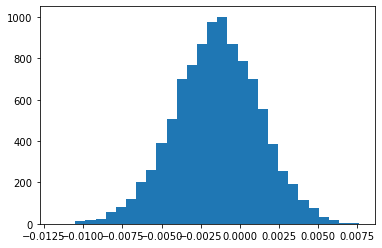

In [192]:
x_pred = predict(beta,X)
print(x_pred)
pred = [x_pred-a for a in pred]
#print(pred)
plt.hist(pred,bins = 30)
plt.show()

In [193]:
print(np.percentile(pred,10))
print(np.percentile(pred,90))
print("CI ",x_pred - np.percentile(pred,90), x_pred - np.percentile(pred,10))

-0.00493942802657879
0.0019111434276515627
CI  0.47305488351560604 0.4799054549698364


In [194]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Boston Data Sunday Magazine has a weekly article commenting on housing units around Boston and gives their recommendation of whether an housing unit is a good purchase or not (assume binary recommendation, either one ("buy") or zero ("no-buy")). Fortunately we have gained some insider information and understand that they make recommendations based on `AGE` (proportion of owner-occupied units built prior to 1940), `DIS` (weighted distances to ﬁve Boston employment centers), `RAD` (index of accessibility to radial highways) and `TAX` (full-value property-tax rate per $10,000).

Suppose their binary buy/no-buy recommendations for the 506 housing units in the `housing.csv` is given below as variable `recommend_buy_data`. We want to model their recommmendation as a logistic regression problem, where the probability of recommending "buy" is given by
$$
    \mathbb{P} [\text{Recommend Buy} | X] = \frac{e^{\gamma_0 + \gamma_1 X_{AGE} + \gamma_2 X_{DIS} + \gamma_3 X_{RAD} + \gamma_4 X_{TAX}}}{ 1 + e^{\gamma_0 + \gamma_1 X_{AGE} + \gamma_2 X_{DIS} + \gamma_3 X_{RAD} + \gamma_4 X_{TAX}}}.
$$

In [195]:
recommend_buy_data = [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

data = pd.read_csv("housing.csv", delim_whitespace=True)
data = data[["AGE", "DIS", "RAD", "TAX"]]
data

,AGE,DIS,RAD,TAX
0,65.2,4.0900,1,296.0
1,78.9,4.9671,2,242.0
2,61.1,4.9671,2,242.0
3,45.8,6.0622,3,222.0
4,54.2,6.0622,3,222.0
...,...,...,...,...
501,69.1,2.4786,1,273.0
502,76.7,2.2875,1,273.0
503,91.0,2.1675,1,273.0
504,89.3,2.3889,1,273.0


7. Conduct a logistic regression using `sklearn.linear_model.LogisticRegression` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and estimate the probability that Boston Data Sunday Magazine would recomendation buying this housing unit with the following data: `[AGE, DIS, RAD, TAX] = [30, 4.5, 3, 230]`.

In [196]:
clf = LogisticRegression(random_state=0).fit(data, recommend_buy_data)
print(data.shape)
print(len(recommend_buy_data))
a = clf.predict([[30, 4.5, 3, 230]])
print(clf.predict_proba([[30, 4.5, 3, 230]]))
clf.score(data, recommend_buy_data)

(506, 4)
506
[[0.40288181 0.59711819]]


0.7727272727272727

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [197]:
grader.check_all()

p4-1 results: All test cases passed!

p4-2 results: All test cases passed!

p4-3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please download the zip file after running the cell below, then upload the zip file to GradeScope for submission. You can also download your notebook as an IPYNB file for the submission. Please also export your notebook as a PDF file (Use **Command/Control + P** if you have issues with the native export as PDF feature). **Please upload and submit both the IPYNB file and the PDF via Gradescope (entry code: GEWXGD).**

In [198]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)